In [2]:
#importing libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
#loading data

fminst = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fminst.load_data()

In [5]:
train_images = train_images/255
test_images = test_images/255

In [6]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


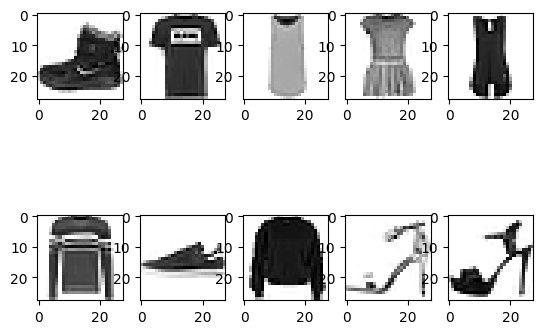

In [7]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    

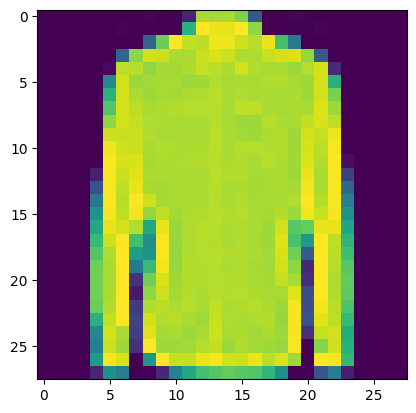

In [12]:
index=39
np.set_printoptions(linewidth=320)
plt.imshow(train_images[index])

In [64]:
#creating model

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [65]:
#compiling model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
#running the model
hs = model.fit(train_images,train_labels, epochs=6,validation_data=(test_images,test_labels))

Epoch 1/6
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4971 - accuracy: 0.8258 - val_loss: 0.4524 - val_accuracy: 0.8402
Epoch 2/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3734 - accuracy: 0.8658 - val_loss: 0.3853 - val_accuracy: 0.8629
Epoch 3/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3365 - accuracy: 0.8761 - val_loss: 0.3828 - val_accuracy: 0.8605
Epoch 4/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3116 - accuracy: 0.8844 - val_loss: 0.3788 - val_accuracy: 0.8635
Epoch 5/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2952 - accuracy: 0.8903 - val_loss: 0.3828 - val_accuracy: 0.8622
Epoch 6/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2818 - accuracy: 0.8947 - val_loss: 0.3558 - val_accuracy: 0.8715


In [67]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3558 - accuracy: 0.8715 - 891ms/epoch - 3ms/step


[0.35576140880584717, 0.8715000152587891]

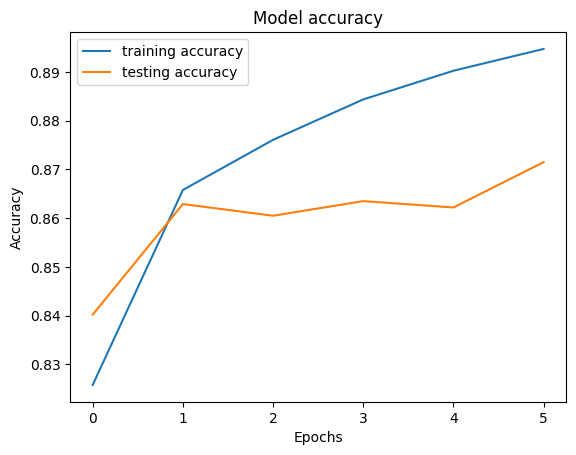

In [68]:
plt.plot(hs.history['accuracy'],label='training accuracy')
plt.plot(hs.history['val_accuracy'],label='testing accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

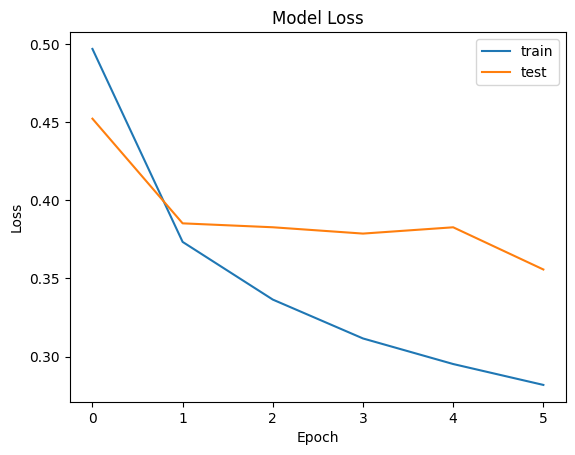

In [69]:
plt.plot(hs.history['loss'],label='train')
plt.plot(hs.history['val_loss'],label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()